In [70]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_style(rc={'font.family': ['sans-serif'],'axis.labelsize': 25})
sns.set_context("notebook")

plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['axes.labelsize'] = 18

# GDP by country

This notebook deals with downloading and processing data on the GDP by country.

## Downloading the country

We will download the data [from the Worldbank](http://data.worldbank.org/indicator/NY.GDP.MKTP.CD). A Makefile 
to automate this process can be located in a local directory of this repo [`../data_sets/GDP_by_Country_WorldBank/Makefile`](../data_sets/GDP_by_Country_WorldBank/Makefile). For convience here is the file:

In [ ]:
# %load ../data_sets/GDP_by_Country_WorldBank/Makefile
DOWNLOAD = data.zip
OUT = ny.gdp.mktp.cd_Indicator_en_csv_v2.csv
.PHONY: download clean

download:
	rm -f ${DOWNLOAD}
	wget http://api.worldbank.org/v2/en/indicator/ny.gdp.mktp.cd?downloadformat=csv -O data.zip
	unzip $(DOWNLOAD)
	rm -f ${DOWNLOAD} Metadata*csv *xml

Once this Make file is run, we can load the data and see what we have

## Initial look

In [81]:
import pandas as pd

df = pd.read_csv("../data_sets/GDP_by_Country_WorldBank/ny.gdp.mktp.cd_Indicator_en_csv_v2.csv", 
                 quotechar='"', skiprows=2)
df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,Unnamed: 59
0,Aruba,ABW,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,2.421475e+09,2.623726e+09,2.791961e+09,2.498933e+09,2.467704e+09,2.584464e+09,NaN,NaN,NaN,NaN
1,Andorra,AND,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,2.823504e+09,3.245412e+09,3.712034e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,5.377778e+08,5.488889e+08,5.466667e+08,7.511112e+08,8.000000e+08,1.006667e+09,...,7.057598e+09,9.843851e+09,1.019053e+10,1.248695e+10,1.593678e+10,1.787016e+10,2.050680e+10,2.030967e+10,NaN,NaN
3,Angola,AGO,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,4.178949e+10,6.044889e+10,8.417808e+10,7.549242e+10,8.247089e+10,1.041159e+11,1.153416e+11,1.241782e+11,NaN,NaN
4,Albania,ALB,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,9.132558e+09,1.070101e+10,1.288135e+10,1.204421e+10,1.192696e+10,1.289087e+10,1.234453e+10,1.292324e+10,NaN,NaN


## Cleaning

### Remove columns

In [82]:
colnames_to_drop = df.columns[np.array([2, 3, -2, -1])]
for c in colnames_to_drop:
    df.drop(c, 1, inplace=True)
    
df.head()

,Country Name,Country Code,1960,1961,1962,1963,1964,1965,1966,1967,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Aruba,ABW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.228279e+09,2.331006e+09,2.421475e+09,2.623726e+09,2.791961e+09,2.498933e+09,2.467704e+09,2.584464e+09,NaN,NaN
1,Andorra,AND,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.322164e+09,2.539759e+09,2.823504e+09,3.245412e+09,3.712034e+09,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,AFG,5.377778e+08,5.488889e+08,5.466667e+08,7.511112e+08,8.000000e+08,1.006667e+09,1.400000e+09,1.673333e+09,...,5.285462e+09,6.275076e+09,7.057598e+09,9.843851e+09,1.019053e+10,1.248695e+10,1.593678e+10,1.787016e+10,2.050680e+10,2.030967e+10
3,Angola,AGO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.964086e+10,2.823370e+10,4.178949e+10,6.044889e+10,8.417808e+10,7.549242e+10,8.247089e+10,1.041159e+11,1.153416e+11,1.241782e+11
4,Albania,ALB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.464447e+09,8.376483e+09,9.132558e+09,1.070101e+10,1.288135e+10,1.204421e+10,1.192696e+10,1.289087e+10,1.234453e+10,1.292324e+10


## First plot

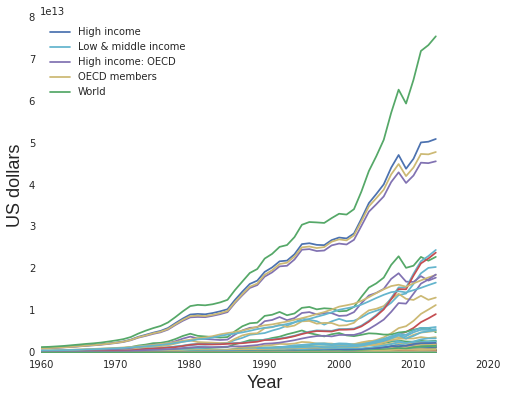

In [109]:
years = [int(i) for i in df.columns.values[2:]]

fig, ax = plt.subplots()

top_5 = df.sort(['2013'], na_position='last', ascending=False).irow(range(5))

for country in df['Country Name']:
    if country in top_5['Country Name'].values:
        label=country
    else:
        label=None
    ax.plot(years, df[df['Country Name'] == country].values[0, 2:],
            label=label)
    
ax.legend(loc='best')
ax.set_xlabel("Year")
ax.set_ylabel("US dollars")
plt.show()

Clearly this data sets also includes things other than countries! Overall I think this will be a useful data set to have around

## Todo

* Turn this into a nice function which automates the cleaning the process
